## Ninja Model for Inchkeith

In [1]:
# Import all the necessary libraries
import numpy as np

from osgeo import gdal
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import folium
from scipy.fftpack import fft2,fftshift,ifft2,ifftshift
from scipy.special import kv
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = (10,10)

In [2]:
# Define function using the Ninja model output

def Ninja_plots(z, u, v, title, col_bar_min, col_bar_max):
    """
    Input:
    - z: elevation file
    - vel: velocity profile from Ninja model
    - ang: angle from Ninja model
    - title: title for subplot
    - col_bar_min and _max: min and max of colorbar (to ensure that colorbar are the same for subplots)
    
    Output: plots a streamplot with the streamlines colored in by wind speed
    """
    u = -vel*np.sin(np.radians(ang))
    v = vel*np.cos(np.radians(ang))
    u = u[::-1,:]
    v = -v[::-1,:]
    wind = np.sqrt(u**2 + v**2)
    
    x = np.arange(-128,128)*dx
    y = np.arange(-128,128)*dx
    plt.streamplot(x[95:161],y[95:161],u[95:161,95:161],v[95:161,95:161],
                   color=wind[95:161,95:161],cmap='seismic',
                   norm=matplotlib.colors.TwoSlopeNorm(vmin=col_bar_min, vcenter=1, vmax=col_bar_max))
    plt.colorbar().set_label(label='Wind speed (m/s)', size=20)
    cs = plt.contour(x[95:161],y[95:161],z[95:161,95:161],alpha = 0.7, colors='k')
    plt.clabel(cs,fmt='%d')
    plt.xlabel('$x$ (m)')
    plt.ylabel('$y$ (m)')
    plt.xlim(-500, 500)
    plt.ylim(-800, 400)
    plt.title(title)

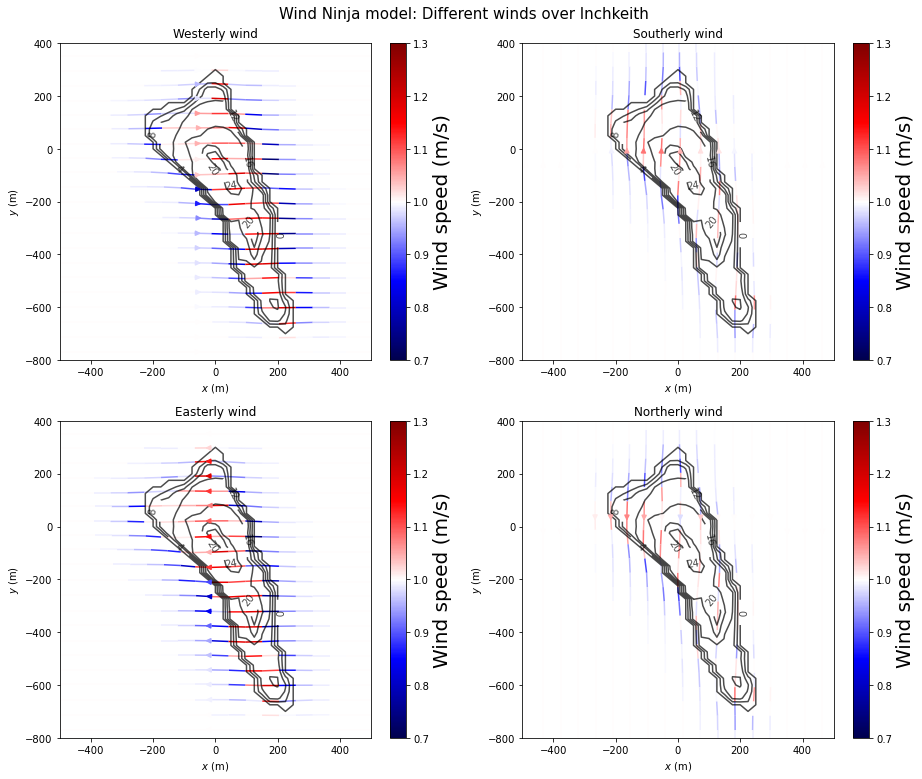

In [3]:
# Plot wind coming from N, E, S, W

ds = gdal.Open('data/Inchkeith.tif')
band = ds.GetRasterBand(1)
z = band.ReadAsArray()
z = z[::-1,:]
dx = 25

plt.figure(figsize=(13, 11))
# Westerly wind
plt.subplot(221)
vel = np.loadtxt('data/Inchkeith_270_1_25m_vel.asc',skiprows=6)
ang = np.loadtxt('data/Inchkeith_270_1_25m_ang.asc',skiprows=6)
Ninja_plots(z, vel, ang, "Westerly wind", col_bar_min = 0.7, col_bar_max=1.3)

# Southerly wind
plt.subplot(222)
vel = np.loadtxt('data/Inchkeith_180_1_25m_vel.asc',skiprows=6)
ang = np.loadtxt('data/Inchkeith_180_1_25m_ang.asc',skiprows=6)
Ninja_plots(z, vel, ang, "Southerly wind", col_bar_min = 0.7, col_bar_max=1.3)

# Easterly wind
plt.subplot(223)
vel = np.loadtxt('data/Inchkeith_90_1_25m_vel.asc',skiprows=6)
ang = np.loadtxt('data/Inchkeith_90_1_25m_ang.asc',skiprows=6)
Ninja_plots(z, vel, ang, "Easterly wind", col_bar_min = 0.7, col_bar_max=1.3)

# Northerly wind
plt.subplot(224)
vel = np.loadtxt('data/Inchkeith_0_1_25m_vel.asc',skiprows=6)
ang = np.loadtxt('data/Inchkeith_0_1_25m_ang.asc',skiprows=6)
Ninja_plots(z, vel, ang, "Northerly wind", col_bar_min = 0.7, col_bar_max=1.3)

plt.suptitle("Wind Ninja model: Different winds over Inchkeith", fontsize = 15)
plt.tight_layout()

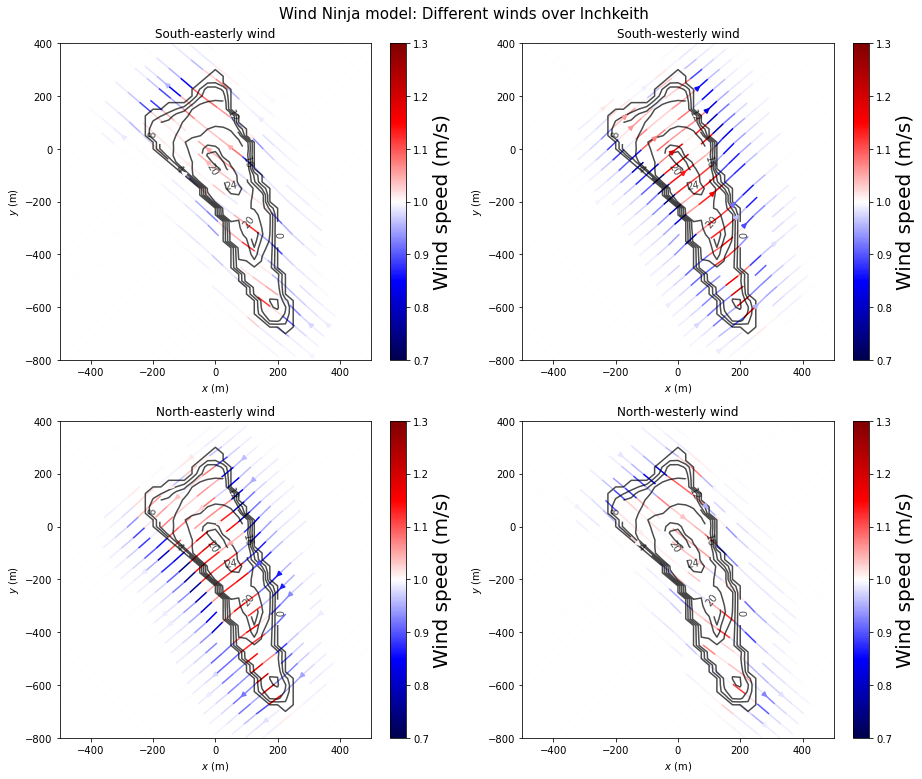

In [4]:
# Plot wind coming from SE, SW, NW, NE
ds = gdal.Open('data/Inchkeith.tif')
band = ds.GetRasterBand(1)
z = band.ReadAsArray()
z = z[::-1,:]
dx = 25

plt.figure(figsize=(13, 11))
# South-easterly wind
plt.subplot(221)
vel = np.loadtxt('data/Inchkeith_135_1_25m_vel.asc',skiprows=6)
ang = np.loadtxt('data/Inchkeith_135_1_25m_ang.asc',skiprows=6)
Ninja_plots(z, vel, ang, "South-easterly wind", col_bar_min = 0.7, col_bar_max=1.3)

# South-westerly wind
plt.subplot(222)
vel = np.loadtxt('data/Inchkeith_225_1_25m_vel.asc',skiprows=6)
ang = np.loadtxt('data/Inchkeith_225_1_25m_ang.asc',skiprows=6)
Ninja_plots(z, vel, ang, "South-westerly wind", col_bar_min = 0.7, col_bar_max=1.3)

# North-easterly wind
plt.subplot(223)
vel = np.loadtxt('data/Inchkeith_45_1_25m_vel.asc',skiprows=6)
ang = np.loadtxt('data/Inchkeith_45_1_25m_ang.asc',skiprows=6)
Ninja_plots(z, vel, ang, "North-easterly wind", col_bar_min = 0.7, col_bar_max=1.3)

# North-westerly wind
plt.subplot(224)
vel = np.loadtxt('data/Inchkeith_315_1_25m_vel.asc',skiprows=6)
ang = np.loadtxt('data/Inchkeith_315_1_25m_ang.asc',skiprows=6)
Ninja_plots(z, vel, ang, "North-westerly wind", col_bar_min = 0.7, col_bar_max=1.3)

plt.suptitle("Wind Ninja model: Different winds over Inchkeith", fontsize = 15)
plt.tight_layout()